In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [200]:
df = pd.read_csv('results_sos_vs_rrt.csv')
df['num_obs'] = df['num_obs'].astype(int)
#df['radius_obs'] = df['num_obs']

In [201]:
heatmaps = {alg: df.groupby(['num_obs', 'radius_obs', ])\
            .agg({'success_'+alg: np.mean,
             }).reset_index()\
            .pivot(index='num_obs', columns='radius_obs')
            for alg in ('sos', 'rrt')}
for alg in ('sos', 'rrt'):
    heatmaps[alg].columns = heatmaps[alg].columns.get_level_values(1)


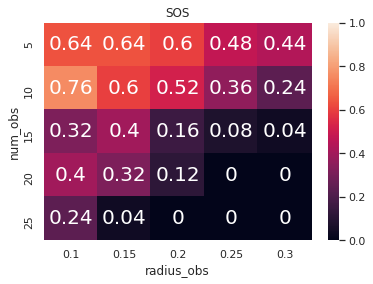

In [202]:
sns.heatmap(heatmaps['sos'], annot=True, vmin=0, vmax=1, annot_kws={"size": 20})
plt.title("SOS")
plt.savefig('heatmap_sos_success.png')

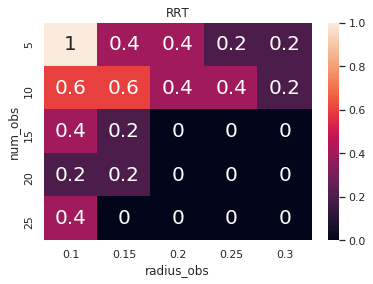

In [203]:
sns.heatmap(heatmaps['rrt'], annot=True, vmin=0, vmax=1, annot_kws={"size": 20})
plt.title("RRT")
plt.savefig('heatmap_rrt_success.png')

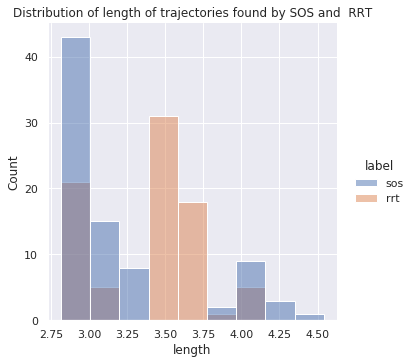

In [204]:
df_when_both_succeed = df[(df.success_rrt == 1) & (df.success_sos == 1)]
length_series = pd.concat([df_when_both_succeed.length_sos, df_when_both_succeed.length_rrt])
length_series_labels = (['sos'] * len(df_when_both_succeed)) + (['rrt'] * len(df_when_both_succeed))
sns.displot(pd.DataFrame({'length': length_series, 'label': length_series_labels}), x='length', hue='label')
plt.title("Distribution of length of trajectories found by SOS and  RRT")
plt.savefig("hist_length_sos_vs_rrt.png")

In [205]:
df[df.length_sos < 1]

obs_seed  solver_seed  num_obs  radius_obs  success_rrt    length_rrt  \
9         1.0          1.0       10        0.30          0.0  1.000000e+09   
14        1.0          1.0       15        0.30          0.0  1.000000e+09   
23        1.0          1.0       25        0.25          0.0  1.000000e+09   
24        1.0          1.0       25        0.30          0.0  1.000000e+09   
34        1.0          2.0       10        0.30          0.0  1.000000e+09   
39        1.0          2.0       15        0.30          0.0  1.000000e+09   
47        1.0          2.0       25        0.20          0.0  1.000000e+09   
48        1.0          2.0       25        0.25          0.0  1.000000e+09   
49        1.0          2.0       25        0.30          0.0  1.000000e+09   
59        1.0          3.0       10        0.30          0.0  1.000000e+09   
64        1.0          3.0       15        0.30          0.0  1.000000e+09   
72        1.0          3.0       25        0.20          0.0  1.000000e+09   
73        1.0          3.0       25        0.25          0.0  1.000000e+09   
74        1.0          3.0       25        0.30          0.0  1.000000e+09   
84        1.0          4.0       10        0.30          0.0  1.000000e+09   
89        1.0          4.0       15        0.30          0.0  1.000000e+09   
98        1.0          4.0       25        0.25          0.0  1.000000e+09   
99        1.0          4.0       25        0.30          0.0  1.000000e+09   
109       1.0          5.0       10        0.30          0.0  1.000000e+09   
114       1.0          5.0       15        0.30          0.0  1.000000e+09   
122       1.0          5.0       25        0.20          0.0  1.000000e+09   
123       1.0          5.0       25        0.25          0.0  1.000000e+09   
124       1.0          5.0       25        0.30          0.0  1.000000e+09   
219       2.0          4.0       20        0.30          0.0  1.000000e+09   
252       3.0          1.0        5        0.20          1.0  2.833913e+00   
253       3.0          1.0        5        0.25          0.0  1.000000e+09   
254       3.0          1.0        5        0.30          0.0  1.000000e+09   
277       3.0          2.0        5        0.20          1.0  2.833913e+00   
278       3.0          2.0        5        0.25          0.0  1.000000e+09   
279       3.0          2.0        5        0.30          0.0  1.000000e+09   
303       3.0          3.0        5        0.25          0.0  1.000000e+09   
304       3.0          3.0        5        0.30          0.0  1.000000e+09   
327       3.0          4.0        5        0.20          1.0  2.833913e+00   
328       3.0          4.0        5        0.25          0.0  1.000000e+09   
329       3.0          4.0        5        0.30          0.0  1.000000e+09   
352       3.0          5.0        5        0.20          1.0  2.833913e+00   
353       3.0          5.0        5        0.25          0.0  1.000000e+09   
354       3.0          5.0        5        0.30          0.0  1.000000e+09   
509       5.0          1.0       10        0.30          0.0  1.000000e+09   
514       5.0          1.0       15        0.30          0.0  1.000000e+09   
519       5.0          1.0       20        0.30          0.0  1.000000e+09   
534       5.0          2.0       10        0.30          0.0  1.000000e+09   
544       5.0          2.0       20        0.30          0.0  1.000000e+09   
559       5.0          3.0       10        0.30          0.0  1.000000e+09   
564       5.0          3.0       15        0.30          0.0  1.000000e+09   
569       5.0          3.0       20        0.30          0.0  1.000000e+09   
584       5.0          4.0       10        0.30          0.0  1.000000e+09   
589       5.0          4.0       15        0.30          0.0  1.000000e+09   
594       5.0          4.0       20        0.30          0.0  1.000000e+09   
609       5.0          5.0       10        0.30          0.0  1.000000e+09   
614       5.0          5.0 

In [206]:
df_when_both_succeed

obs_seed  solver_seed  num_obs  radius_obs  success_rrt  length_rrt  \
0         1.0          1.0        5        0.10          1.0    3.538405   
1         1.0          1.0        5        0.15          1.0    3.538405   
2         1.0          1.0        5        0.20          1.0    3.538405   
3         1.0          1.0        5        0.25          1.0    3.538405   
4         1.0          1.0        5        0.30          1.0    3.538405   
..        ...          ...      ...         ...          ...         ...   
555       5.0          3.0       10        0.10          1.0    3.154022   
575       5.0          4.0        5        0.10          1.0    2.833913   
580       5.0          4.0       10        0.10          1.0    3.154022   
600       5.0          5.0        5        0.10          1.0    2.833913   
605       5.0          5.0       10        0.10          1.0    3.154022   

     success_sos  length_sos  
0            1.0    2.930358  
1            1.0    2.966434  
2            1.0    3.005909  
3            1.0    3.044112  
4            1.0    3.085823  
..           ...         ...  
555          1.0    4.542195  
575          1.0    2.986706  
580          1.0    2.860783  
600          1.0    2.973678  
605          1.0    2.859771  

[81 rows x 8 columns]